# Advanced Data Problems

1) Uniformity

2) Cross Field Validation ( To check the accuracy of the Data)

3) Completeness- Missing Data- CLEANING DATA IN PYTHON

__In this chapter,___ you’ll dive into more advanced data cleaning problems, such as ensuring that weights are all written in kilograms instead of pounds. You’ll also gain invaluable skills that will help you verify that values have been added correctly and that missing values don’t negatively impact your analyses.

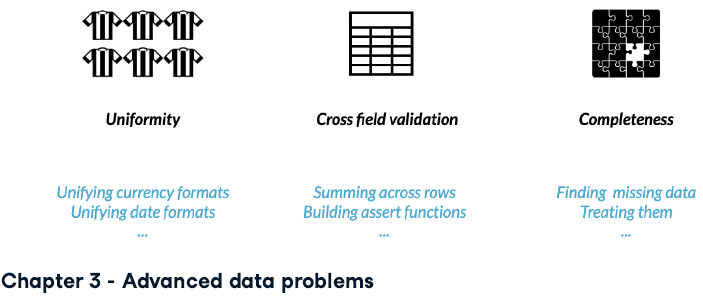

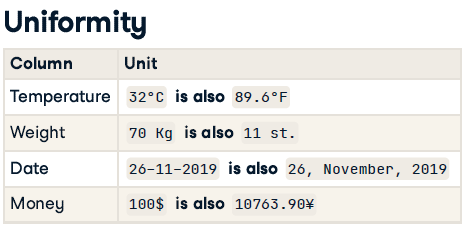

In [5]:
import pandas as pd

temperatures = pd.read_csv('./Data/temperature.csv', index_col = 0)
print(temperatures.head(10))

        Date  Temperature
0   3/3/2019           14
1   4/3/2019           15
2   5/3/2019           18
3   6/3/2019           19
4   7/3/2019           16
5   8/3/2019           67
6   9/3/2019           15
7  10/3/2019           19
8  11/3/2019           20
9  12/3/2019           65


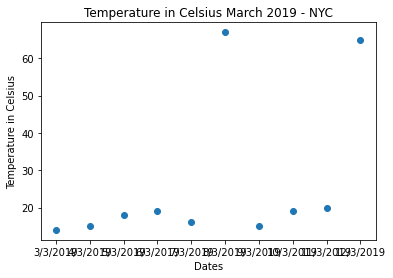

In [8]:
# Import matplotlib
import matplotlib.pyplot as plt
# Create scatter plot
plt.scatter(x = 'Date', y = 'Temperature', data = temperatures)
# Create title, xlabel and ylabel
plt.title('Temperature in Celsius March 2019 - NYC')
plt.xlabel('Dates')
plt.ylabel('Temperature in Celsius')
# Show plot
plt.show()

### Treating temperature data

In [9]:
temp_fah = temperatures.loc[temperatures['Temperature'] > 40, 'Temperature']
temp_cels = (temp_fah - 32) * (5/9)
temperatures.loc[temperatures['Temperature'] > 40, 'Temperature'] = temp_cels

In [10]:
# Assert conversion is correct
assert temperatures['Temperature'].max() < 40

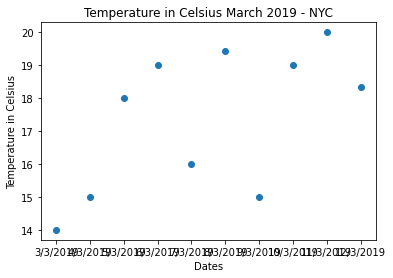

In [15]:
# Import matplotlib
import matplotlib.pyplot as plt
# Create scatter plot
plt.scatter(x = 'Date', y = 'Temperature', data = temperatures)
# Create title, xlabel and ylabel
plt.title('Temperature in Celsius March 2019 - NYC')
plt.xlabel('Dates')
plt.ylabel('Temperature in Celsius')
# Show plot
plt.show()

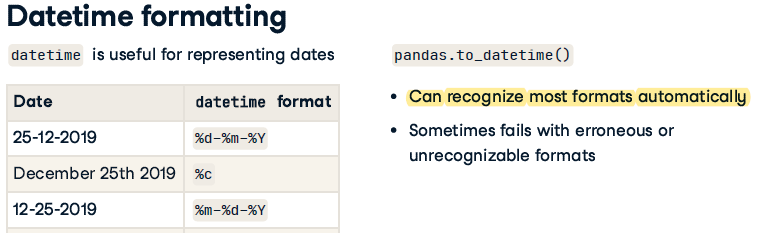

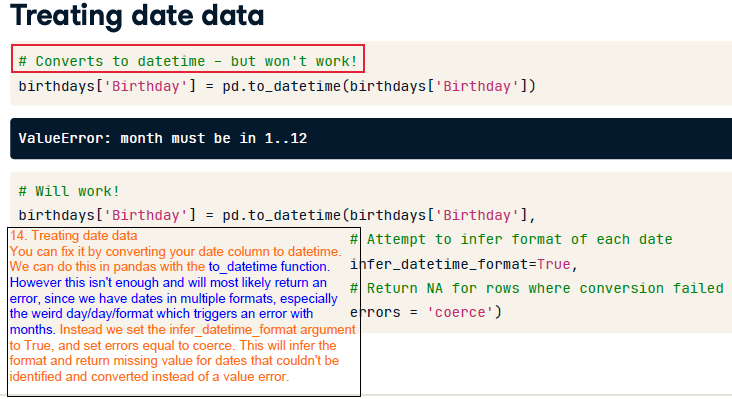

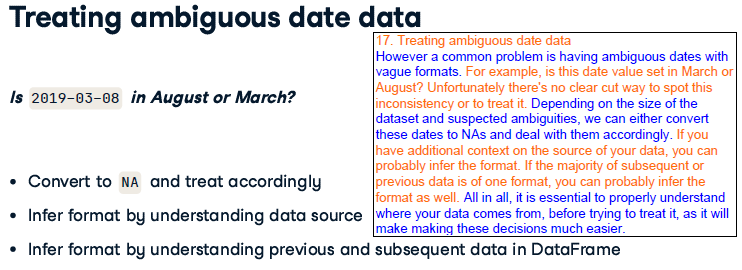

## Cross field validation

In [19]:
import pandas as pd

flights = pd.read_csv('./Data/flights.csv', index_col = 0)
flights.head()

,flight_number,economy_class,business_class,first_class,total_passengers
0,DL140,100,60,40,200
1,BA248,130,100,70,300
2,MEA124,100,50,50,200
3,AFR939,140,70,90,300
4,TKA101,130,100,20,250


In [21]:
# The use of multiple fields in a dataset to sanity check data integrity

sum_classes = flights[['economy_class', 'business_class', 'first_class']].sum(axis = 1)
passenger_equ = sum_classes == flights['total_passengers']
# Find and filter out rows with inconsistent passenger totals
inconsistent_pass = flights[~passenger_equ]
consistent_pass = flights[passenger_equ]

### Uniformity

In [43]:
import pandas as pd
import datetime as dt

banking = pd.read_csv('./Data/banking.csv', index_col = 0)
print(banking.head())

    cust_id  birth_date  Age  acct_amount  inv_amount   fund_A   fund_B  \
0  870A9281  1962-06-09   58     63523.31       51295  30105.0   4138.0   
1  166B05B0  1962-12-16   58     38175.46       15050   4995.0    938.0   
2  BFC13E88  1990-09-12   34     59863.77       24567  10323.0   4590.0   
3  F2158F66  1985-11-03   35     84132.10       23712   3908.0    492.0   
4  7A73F334  1990-05-17   30    120512.00       93230  12158.4  51281.0   

    fund_C   fund_D account_opened last_transaction  
0   1420.0  15632.0       02-09-18         22-02-19  
1   6696.0   2421.0       28-02-19         31-10-18  
2   8469.0   1185.0       25-04-18         02-04-18  
3   6482.0  12830.0       07-11-17         08-11-18  
4  13434.0  18383.0       14-05-18         19-07-18  


In [47]:
"""
Data Integrity:
You want to understand how customers of different age groups invest. 
However, you want to first make sure the data you're analyzing is correct. 
You will do so by cross field checking values of inv_amount and age against
the amount invested in different funds and customers' birthdays.


"""

"\nData Integrity:\nYou want to understand how customers of different age groups invest. \nHowever, you want to first make sure the data you're analyzing is correct. \nYou will do so by cross field checking values of inv_amount and age against\nthe amount invested in different funds and customers' birthdays.\n\n\n"

In [49]:
# Print the header of account_opened
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

0   2018-02-09
1   2019-02-28
2   2018-04-25
3   2017-07-11
4   2018-05-14
Name: account_opened, dtype: datetime64[ns]


In [ ]:
"""

However, since this data was consolidated from multiple sources, you need 
to make sure that all dates are of the same format. You will do so by 
converting this column into a datetime object, while making sure that the 
format is inferred and potentially incorrect formats are set to missing.


"""

In [59]:
# Print the header of account_opend
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'].tail())

0   2018-02-09
1   2019-02-28
2   2018-04-25
3   2017-07-11
4   2018-05-14
Name: account_opened, dtype: datetime64[ns]
95    2018
96    2017
97    2017
98    2017
99    2017
Name: acct_year, dtype: object


In [54]:
# Convert birth_date to datetime
banking['birth_date'] = pd.to_datetime(banking['birth_date'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

In [60]:
# Convert age to datetime
banking['Age'] = pd.to_datetime(banking['Age'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce')

## Cross Validation

In [ ]:
"""

You want to understand how customers of different age groups invest. 
However, you want to first make sure the data you're analyzing is correct.
You will do so by cross field checking values of inv_amount and age against
the amount invested in different funds and customers' birthdays.


"""

In [62]:
# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = banking['Age'] == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  100


In [ ]:
# ----------------------------------------------------#

In [25]:
import pandas as pd
import datetime as dt

users = pd.read_csv('./Data/birthdays.csv', index_col = 0)
print(users.head())

   user_id  Age    Birthday
0    32985   22    3/2/1998
1    94387   27   12/4/1993
2    34236   42  11/24/1978
3    12551   31    1/3/1989
4    55212   18    7/2/2002


In [26]:
# Convert to datetime and get today's date
users['Birthday'] = pd.to_datetime(users['Birthday'])
today = dt.date.today()

# For each row in the Birthday column, calculate year difference
age_manual = today.year - users['Birthday'].dt.year

# Find instances where ages match
age_equ = age_manual == users['Age']

# Find and filter out rows with inconsistent age
inconsistent_age = users[~age_equ]
consistent_age = users[age_equ]

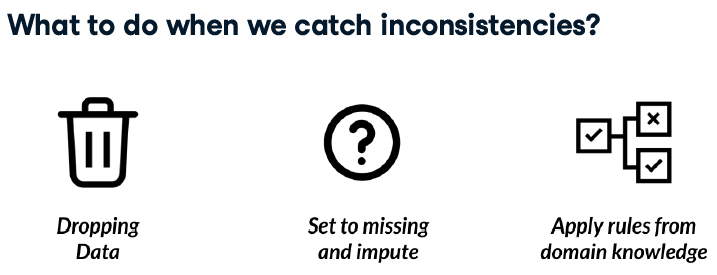

## Completeness

cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_year           0
dtype: int64


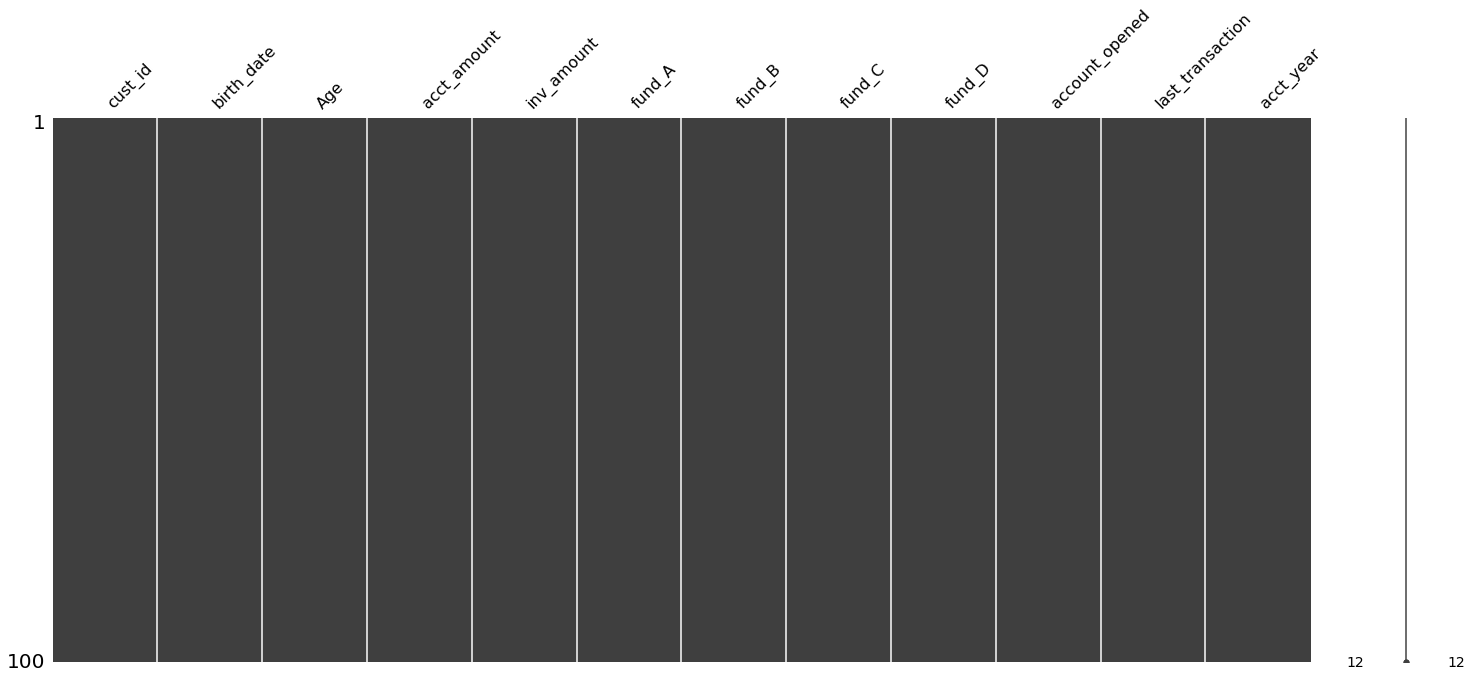

In [63]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

In [67]:
# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

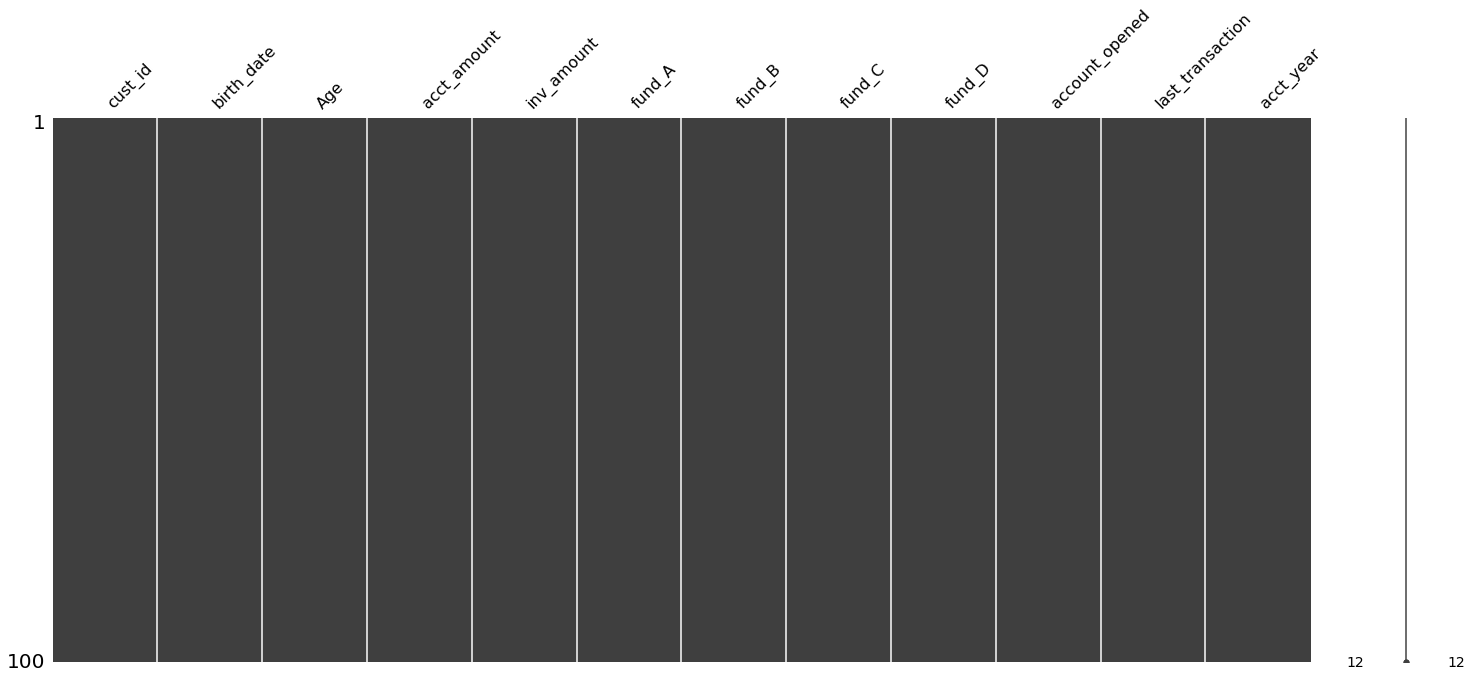

In [69]:
# Sort banking by age and visualize
banking_sorted = banking.sort_values(by = 'Age')
msno.matrix(banking_sorted)
plt.show()

In [71]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount'] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_year           0
dtype: int64


In [ ]:
# Awesome work! As you can see no missing data left, you can definitely 
# bank on getting your analysis right!

In [ ]:
# ------------------------------------------ #

In [28]:
import pandas as pd
airquality = pd.read_csv('./Data/airquality.csv', index_col = 0)
print(airquality)

            Date  Temperature  CO2
987   20/04/2004         16.8  0.0
2119    7/6/2004         18.7  0.8
2451  20/06/2004        -40.0  NaN
1984    1/6/2004         19.6  1.8
8299  19/02/2005         11.2  1.2


In [29]:
# Return missing values
airquality.isna()

,Date,Temperature,CO2
987,False,False,False
2119,False,False,False
2451,False,False,True
1984,False,False,False
8299,False,False,False


In [30]:
# Get summary of missingness
airquality.isna().sum()

Date           0
Temperature    0
CO2            1
dtype: int64

### Missingno - Package for visualizing & understanding missing data

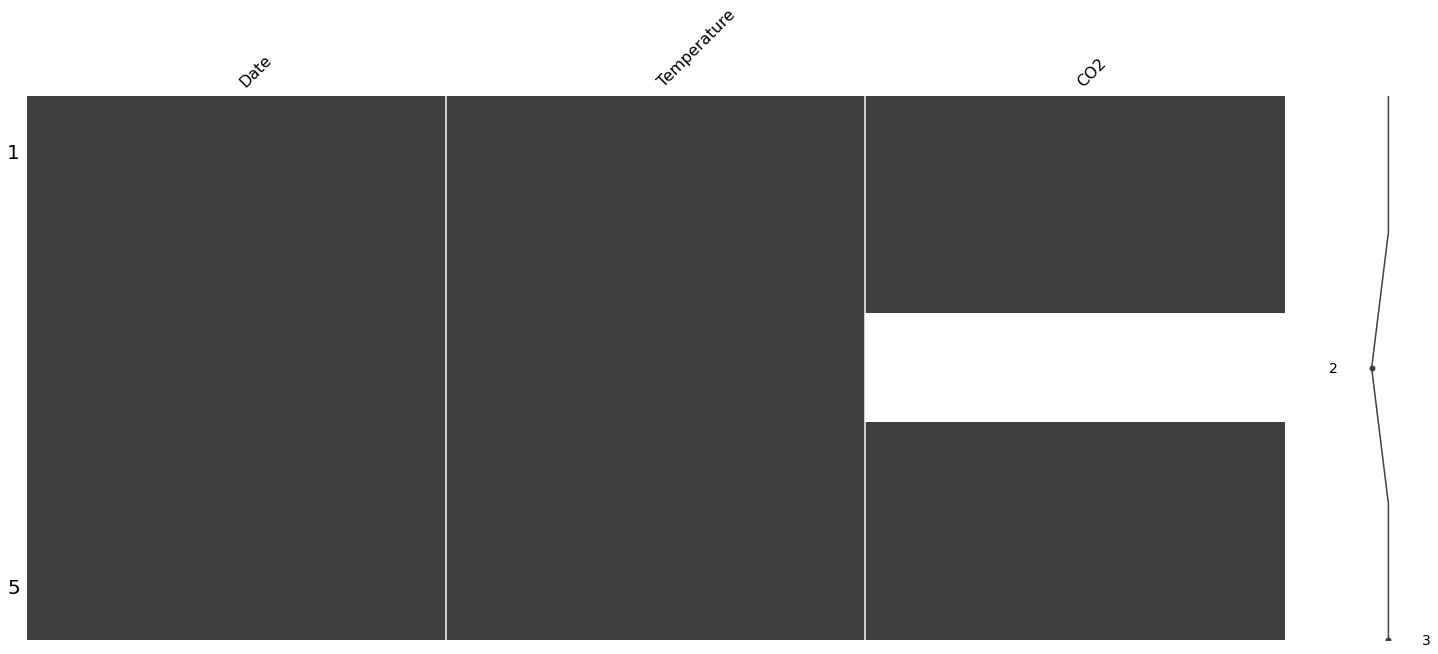

In [31]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missingness
msno.matrix(airquality)
plt.show()

In [32]:
# Isolate missing and complete values aside
missing = airquality[airquality['CO2'].isna()]
complete = airquality[~airquality['CO2'].isna()]

In [33]:
# Describe complete DataFramee
complete.describe()

,Temperature,CO2
count,4.00000,4.000000
mean,16.57500,0.950000
std,3.76862,0.754983
min,11.20000,0.000000
25%,15.40000,0.600000
50%,17.75000,1.000000
75%,18.92500,1.350000
max,19.60000,1.800000


In [34]:
# Describe missing DataFramee
missing.describe()

,Temperature,CO2
count,1.0,0.0
mean,-40.0,NaN
std,NaN,NaN
min,-40.0,NaN
25%,-40.0,NaN
50%,-40.0,NaN
75%,-40.0,NaN
max,-40.0,NaN


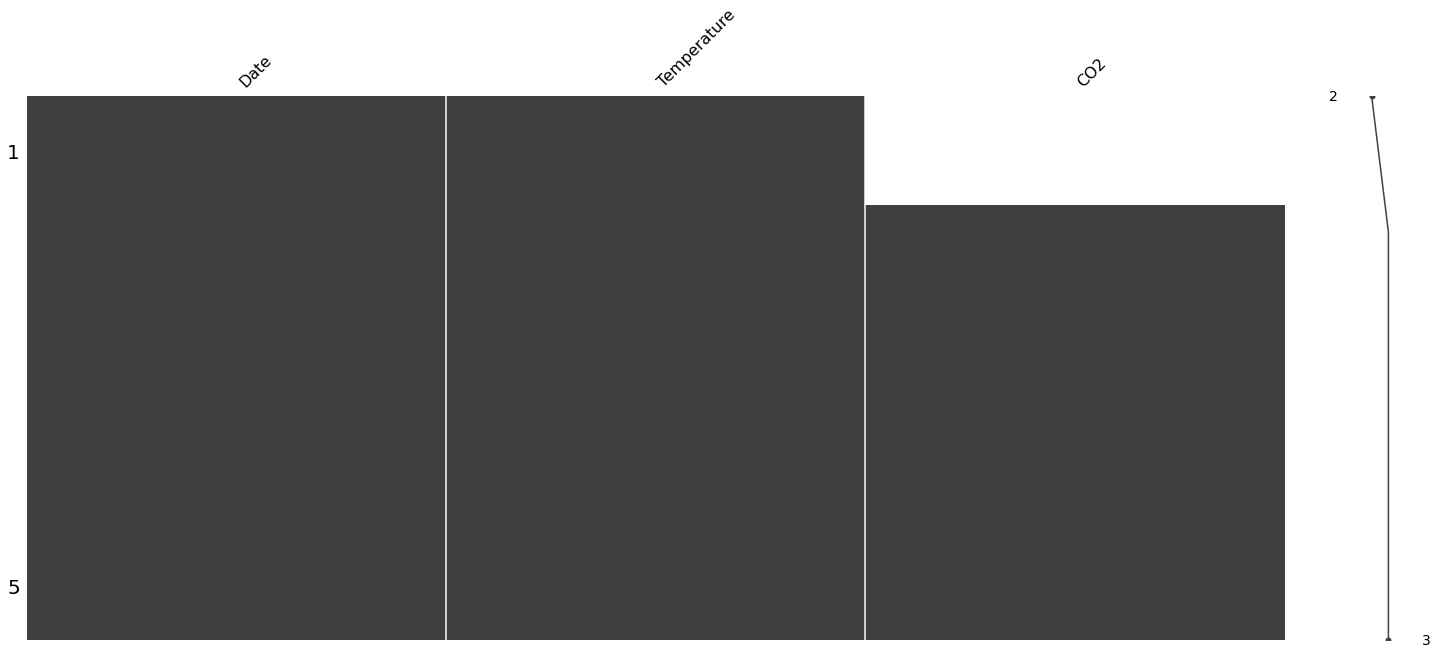

In [35]:
sorted_airquality = airquality.sort_values(by = 'Temperature')
msno.matrix(sorted_airquality)
plt.show()

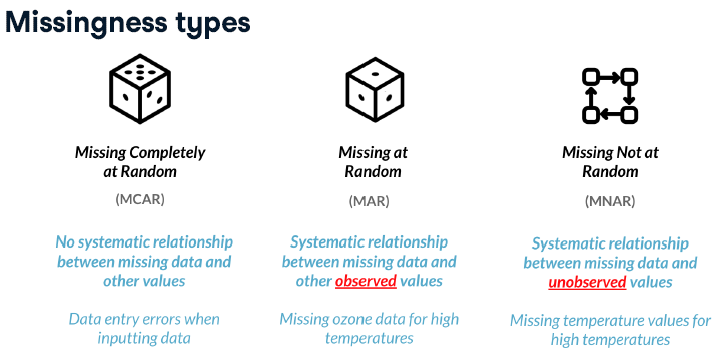

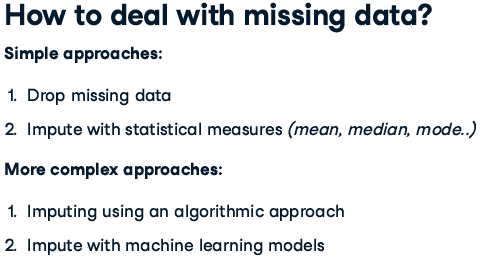

### Dropping missing values

In [36]:
# Drop missing values
airquality_dropped = airquality.dropna(subset = ['CO2'])
airquality_dropped.head()

,Date,Temperature,CO2
987,20/04/2004,16.8,0.0
2119,7/6/2004,18.7,0.8
1984,1/6/2004,19.6,1.8
8299,19/02/2005,11.2,1.2


### Replacing with statistical measures

In [37]:
co2_mean = airquality['CO2'].mean()
airquality_imputed = airquality.fillna({'CO2': co2_mean})
airquality_imputed.head()

,Date,Temperature,CO2
987,20/04/2004,16.8,0.00
2119,7/6/2004,18.7,0.80
2451,20/06/2004,-40.0,0.95
1984,1/6/2004,19.6,1.80
8299,19/02/2005,11.2,1.20
